# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [66]:
# Libraries
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [5]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

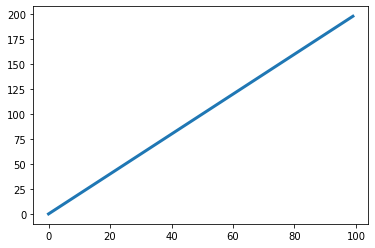

In [15]:
# Method 1

plt.plot(x, y, '-', linewidth = 3)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

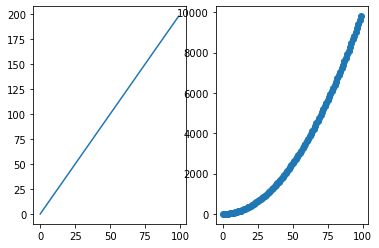

In [18]:
# Method 2
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(x, y, '-')
axes[1].scatter(x, z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

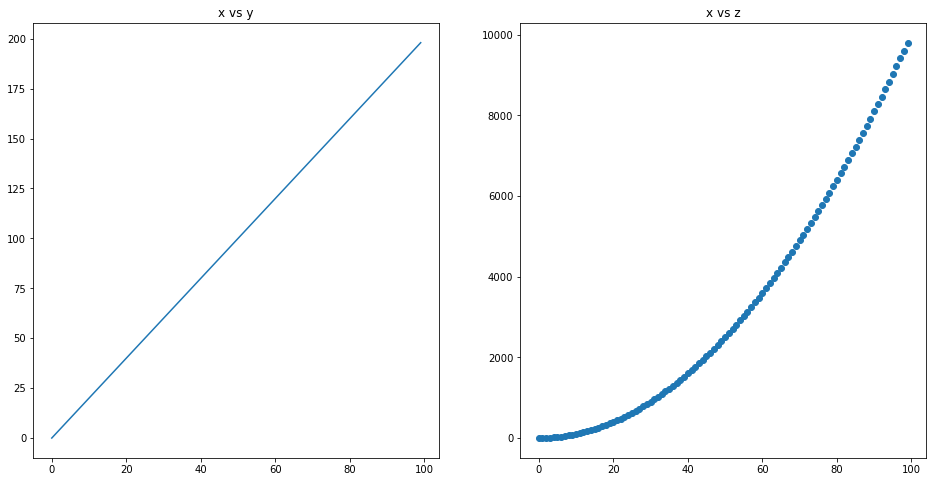

In [21]:
# your code here
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))
axes[0].plot(x, y, '-')
axes[1].scatter(x, z)
axes[0].set_title('x vs y')
axes[1].set_title('x vs z');

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

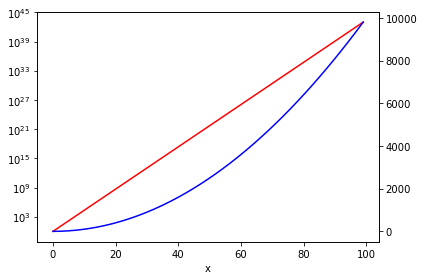

In [42]:
# your code here

# Define the first Figure
fig, ax1 = plt.subplots()
ax1.set_xlabel('x')
ax1.set_yscale('log')
ax1.plot(x, np.exp(x), color = 'red')


# ax1 and ax2 share the same x axis
ax2 = ax1.twinx()


# Define the second Figure
ax2.set_xlabel('x')
ax2.set_yscale('linear')
ax2.plot(x, x**2, color = 'blue')


fig.tight_layout() 
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

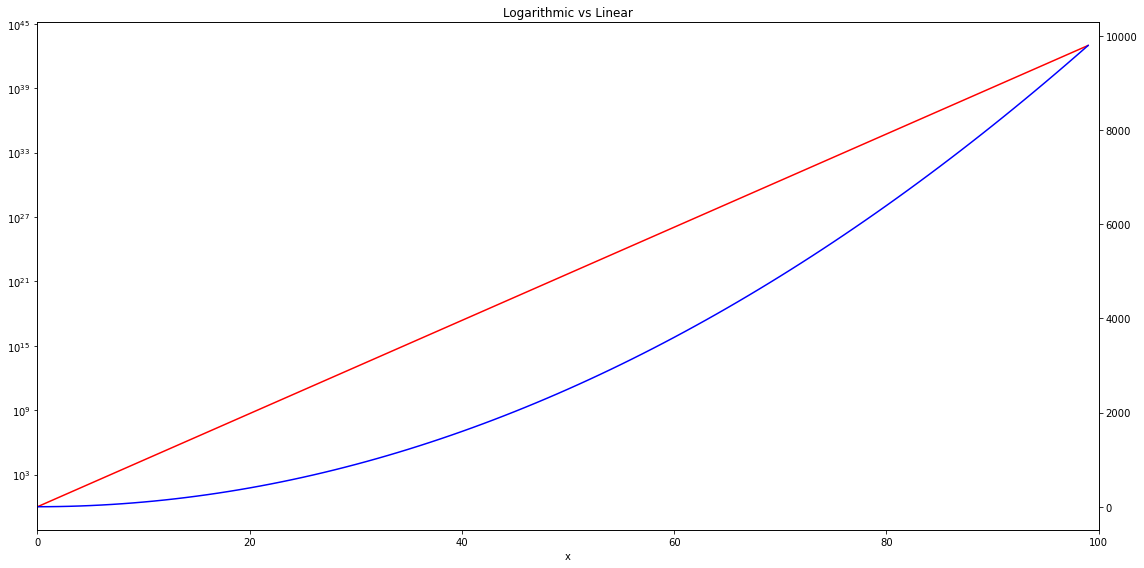

In [50]:
# your code here

# Define the first Figure
fig, ax1 = plt.subplots(figsize = (16,8))
ax1.set_xlabel('x')
ax1.set_yscale('log')
ax1.plot(x, np.exp(x), color = 'red')


# ax1 and ax2 share the same x axis
ax2 = ax1.twinx()


# Define the second Figure
ax2.set_xlabel('x')
ax2.set_yscale('linear')
ax2.plot(x, x**2, color = 'blue')

ax1.set(title = 'Logarithmic vs Linear',
       xlim = [0, 100])

fig.tight_layout() 
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [12]:
# your code here

fitbit = pd.read_csv('./../fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

Text(0.5, 1.0, 'Number of steps in workday or weekenday')

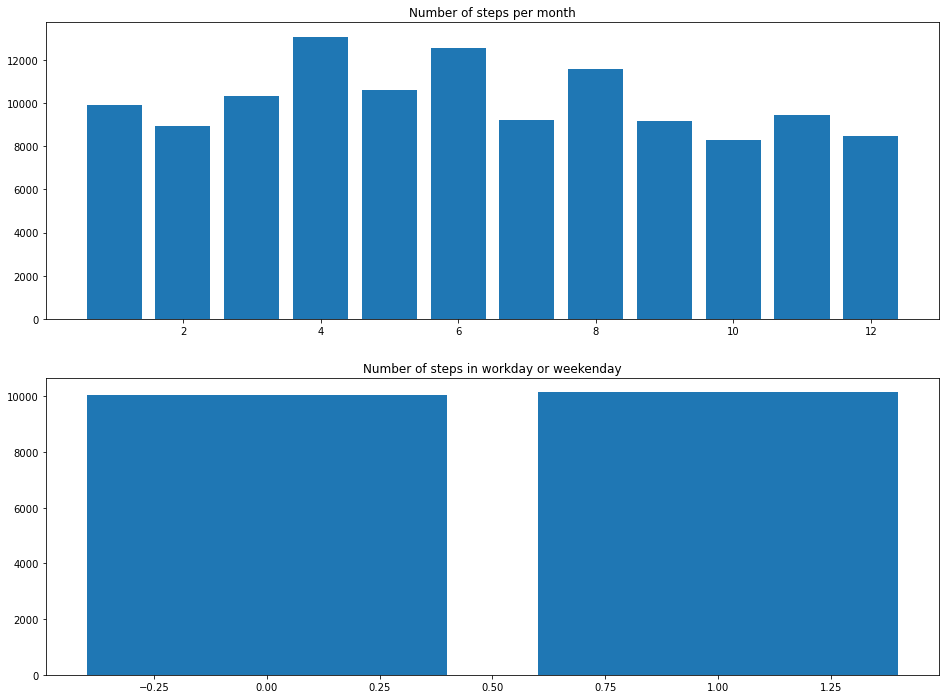

In [36]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
median_steps_encoded = fitbit.groupby('Months_encoded').agg({'Steps': 'mean'})
median_steps_encoded.reset_index(inplace = True)

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
median_steps_work = fitbit.groupby('Work_or_Weekend').agg({'Steps': 'mean'})
median_steps_work.reset_index(inplace = True)

fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (16,12))

ax[0].bar(median_steps_encoded['Months_encoded'], median_steps_encoded['Steps'])
ax[1].bar(median_steps_work['Work_or_Weekend'], median_steps_work['Steps'])

ax[0].set_title('Number of steps per month')
ax[1].set_title('Number of steps in workday or weekenday')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

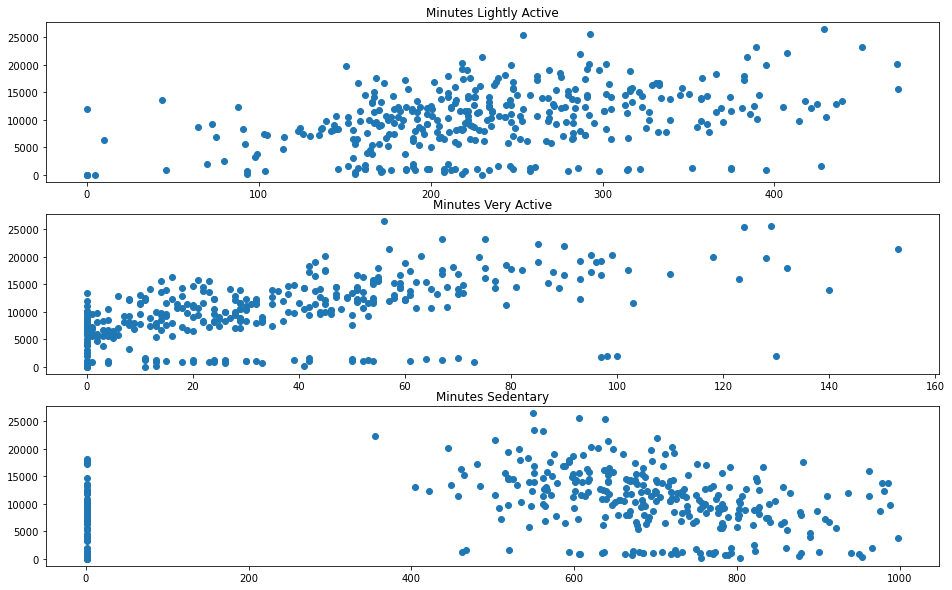

In [57]:
# your code here
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (16, 10))
data = [fitbit['Minutes Lightly Active'], fitbit['Minutes Very Active'], fitbit['Minutes Sedentary']]
titles = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for axes, cols, title in zip(ax, data, titles):
    axes.scatter(cols, fitbit['Steps'])
    axes.set_title(f'{title}')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [60]:
# your code here
titanic = pd.read_csv('./../titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [61]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [64]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include = ['int', 'float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7925.0000
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [65]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(exclude = ['int', 'float64'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [104]:
# your code here

mpl.style.use('classic')
fig = plt.figure(figsize = (16, 8))

<Figure size 1280x640 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

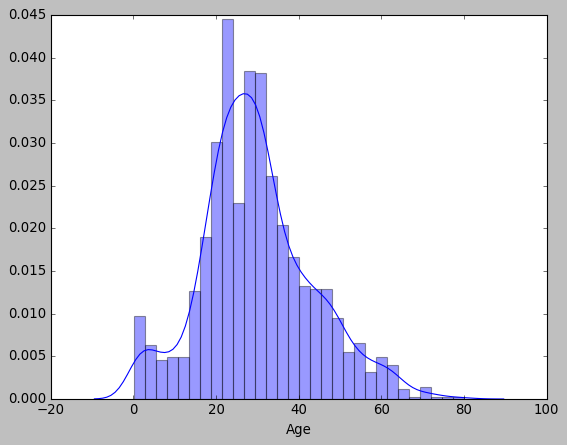

In [109]:
# your code here

sns.distplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

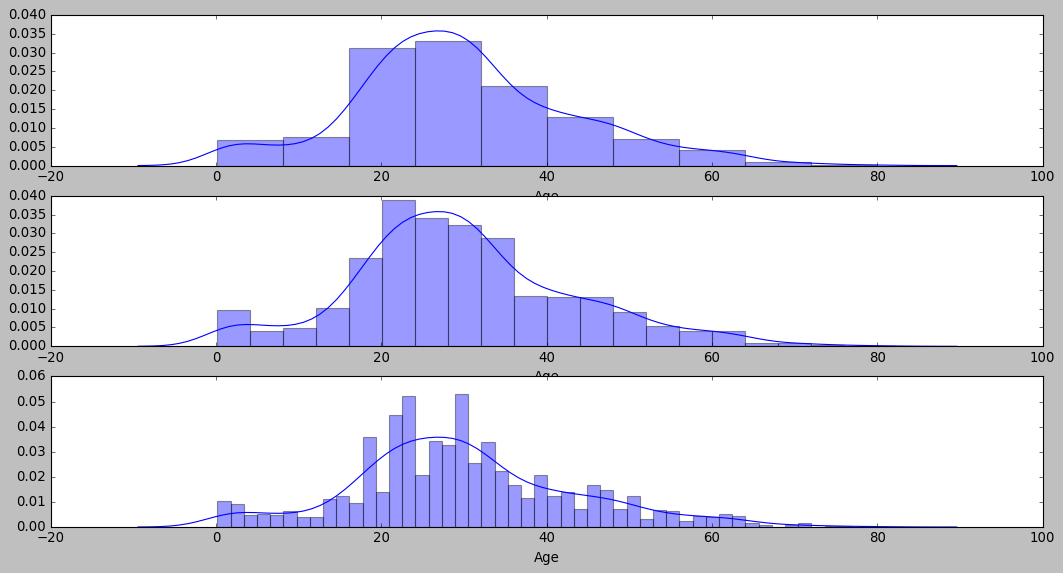

In [119]:
# your code here
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = (16, 8))


sns.distplot(titanic['Age'], bins = 10, ax = ax[0])
ax[1] = sns.distplot(titanic['Age'], bins = 20, ax = ax[1])
ax[2] = sns.distplot(titanic['Age'], bins = 50, ax = ax[2])

#### How does the bin size affect your plot?

In [ ]:
"""
The higher the number of bins the more accurate is the distribution
"""

#### Use seaborn to show the distribution of column `Age`.

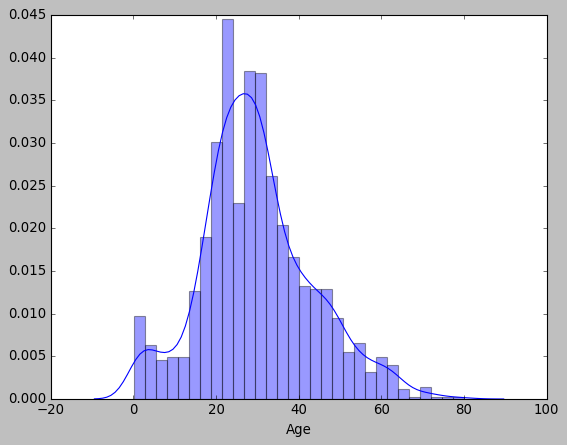

In [120]:
# your code here
sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

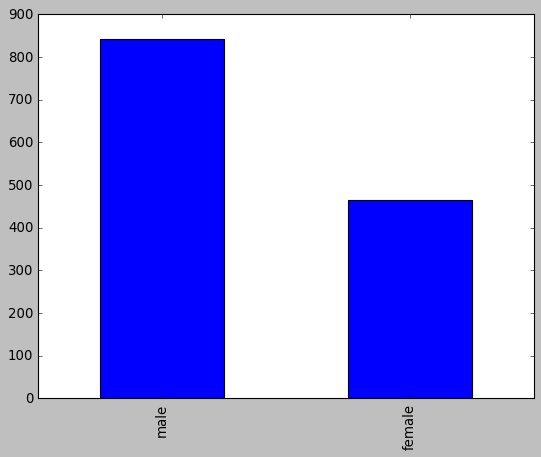

In [123]:
# Method 1 - matplotlib
# your code here

titanic['Gender'].value_counts().plot(kind = 'bar')

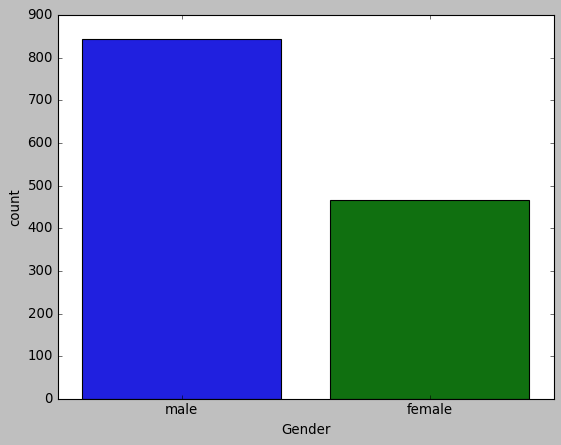

In [126]:
# Method 2 - seaborn
# your code here
sns.countplot(data = titanic, x = 'Gender')

#### Use the right plot to visualize the column `Pclass`.

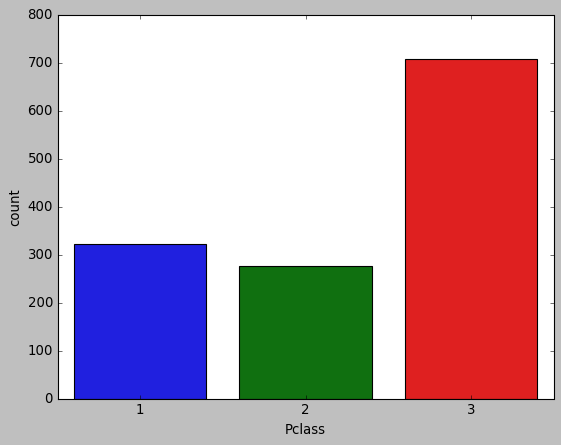

In [127]:
# your code here 

sns.countplot(data = titanic, x = 'Pclass')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

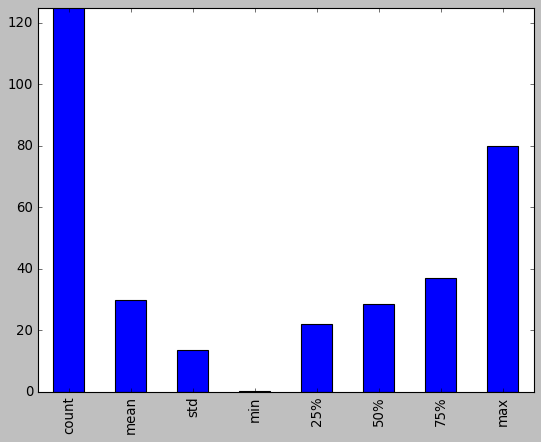

In [138]:
# your code here

titanic['Age'].describe().plot(kind = 'bar', ylim = [0, 125])

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The maximum value is 80, the mean is around 30, the data is quite dispersed due to the standard devitation
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

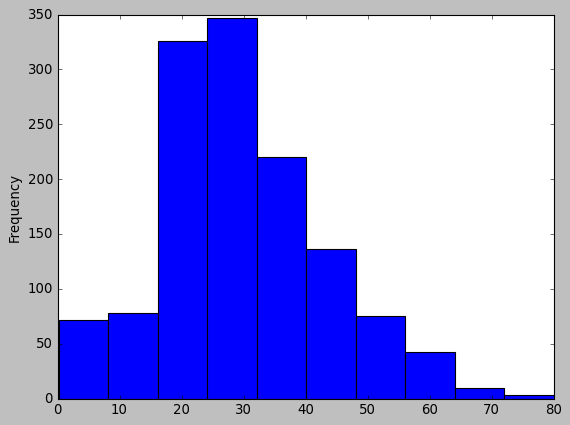

In [144]:
# your code here

titanic['Age'].plot(kind = 'hist')

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Is not disperse
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

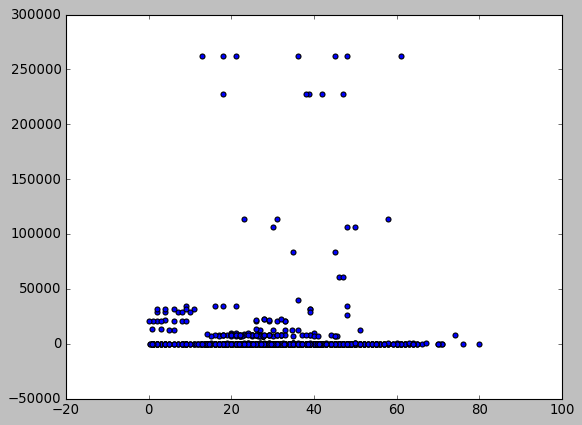

In [149]:
# Method 1 - matplotlib
# your code here

plt.scatter(x = titanic['Age'], y = titanic['Fare'])

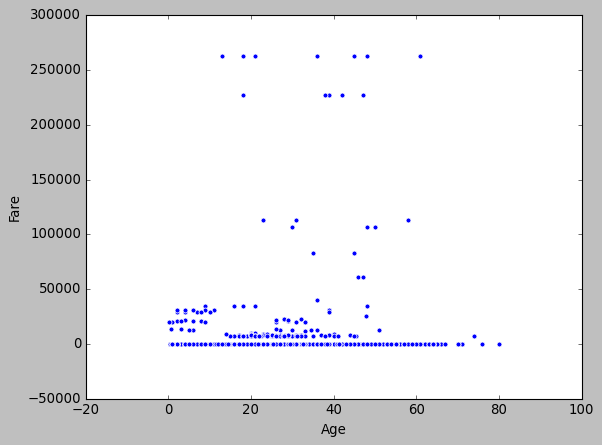

In [151]:
# Method 2 - seaborn
# your code here

sns.scatterplot(data = titanic, x = 'Age', y ='Fare');

#### Plot the correlation matrix using seaborn.

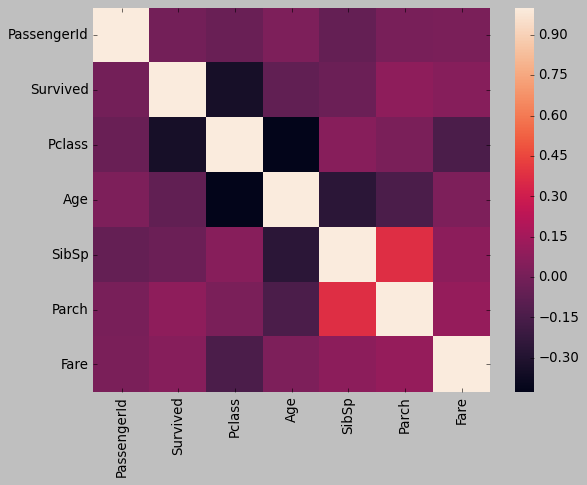

In [153]:
# your code here

correlation = titanic.corr(method = 'pearson') 
sns.heatmap(correlation)

#### What are the most correlated features?

In [ ]:
"""
SibSp and Parch
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

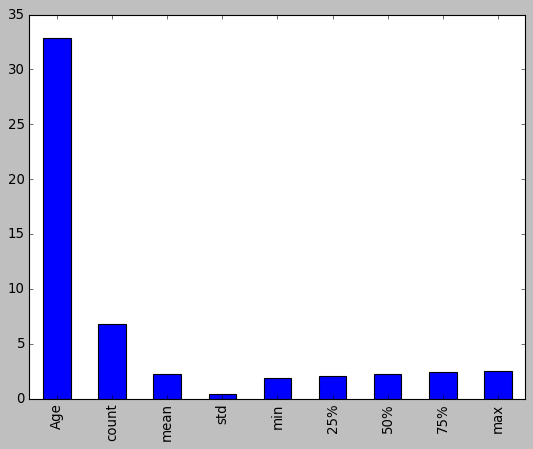

In [172]:
# your code here

summary = titanic.groupby('Age').describe()['Pclass']
summary.reset_index(inplace = True)

summary.mean().plot(kind = 'bar')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

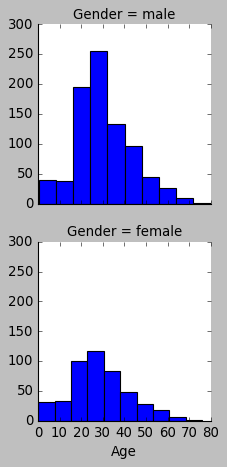

In [161]:
# your code here

grid = sns.FacetGrid(titanic, row = 'Gender')
grid.map(plt.hist, 'Age')